### Uczenie maszynowe
# 4. Sieci neuronowe – wprowadzenie

In [1]:
# Przydatne importy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 4.1. Perceptron

https://www.youtube.com/watch?v=cNxadbrN_aI

<img style="margin: auto" heighth="100%" src="http://m.natemat.pl/b94a41cd7322e1b8793e4644e5f82683,641,0,0,0.png" alt="Frank Rosenblatt"/>

<img style="margin: auto" src="http://m.natemat.pl/02943a7dc0f638d786b78cd5c9e75742,641,0,0,0.png" heighth="100%" alt="Frank Rosenblatt"/>

<img style="margin: auto" heighth="100%" src="https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg" alt="perceptron"/>

### Pierwszy perceptron liniowy

* Frank Rosenblatt, 1957
* aparat fotograficzny podłączony do 400 fotokomórek (rozdzielczość obrazu: 20 x 20)
* wagi – potencjometry aktualizowane za pomocą silniczków

### Uczenie perceptronu

Cykl uczenia perceptronu Rosenblatta:

1. Sfotografuj planszę z kolejnym obiektem.
1. Zaobserwuj, która lampka zapaliła się na wyjściu.
1. Sprawdź, czy to jest właściwa lampka.
1. Wyślij sygnał „nagrody” lub „kary”.

### Funkcja aktywacji

Funkcja bipolarna:

$$ g(z) = \left\{ 
\begin{array}{rl}
1  & \textrm{gdy $z > \theta_0$} \\
-1 & \textrm{wpp.}
\end{array}
\right. $$

gdzie $z = \theta_0x_0 + \ldots + \theta_nx_n$,<br/>
$\theta_0$ to próg aktywacji,<br/>
$x_0 = 1$. 

In [3]:
def bipolar_plot():
    matplotlib.rcParams.update({'font.size': 16})

    plt.figure(figsize=(8,5))
    x = [-1,-.23,1] 
    y = [-1, -1, 1]
    plt.ylim(-1.2,1.2)
    plt.xlim(-1.2,1.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.step(x, y, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.show()

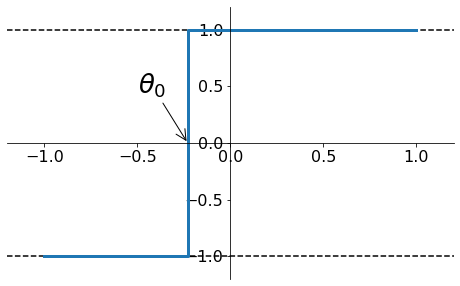

In [4]:
bipolar_plot()

### Perceptron – schemat

<img src="perceptron.png" width="60%"/>

#### Perceptron – zasada działania

1. Ustal wartości początkowe $\theta$ (wektor 0 lub liczby losowe blisko 0).
1. Dla każdego przykładu $(x^{(i)}, y^{(i)})$, dla $i=1,\ldots,m$
    * Oblicz wartość wyjścia $o^{(i)} = g(\theta^{T}x^{(i)}) = g(\sum_{j=0}^{n} \theta_jx_j^{(i)})$
    * Wykonaj aktualizację wag (tzw. *perceptron rule*):
    $$ \theta := \theta + \Delta \theta $$
    $$ \Delta \theta = \alpha(y^{(i)}-o^{(i)})x^{(i)} $$

$$\theta_j := \theta_j + \Delta \theta_j $$

Jeżeli przykład został sklasyfikowany **poprawnie**:

* $y^{(i)}=1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(1 - 1)x_j^{(i)} = 0$$
* $y^{(i)}=-1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(-1 - -1)x_j^{(i)} = 0$$

Czyli: jeżeli trafiłeś, to nic nie zmieniaj.

$$\theta_j := \theta_j + \Delta \theta_j $$

Jeżeli przykład został sklasyfikowany **niepoprawnie**:

* $y^{(i)}=1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(1 - -1)x_j^{(i)} = 2 \alpha x_j^{(i)}$$
* $y^{(i)}=-1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(-1 - 1)x_j^{(i)} = -2 \alpha x_j^{(i)}$$

Czyli: przesuń wagi w odpowiednią stronę.

### Perceptron – zalety

* intuicyjny i prosty
* łatwy w implementacji
* jeżeli dane można liniowo oddzielić, algorytm jest zbieżny w skończonym czasie

### Perceptron – wady

* jeżeli danych nie można oddzielić liniowo, algorytm nie jest zbieżny

In [5]:
def plot_perceptron():
    plt.figure(figsize=(12,3))

    plt.subplot(131)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.title('AND')
    plt.plot([1,0,0], [0,1,0], 'ro', markersize=10)
    plt.plot([1], [1], 'go', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))


    plt.subplot(132)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.plot([1,0,1], [0,1,1], 'go', markersize=10)
    plt.plot([0], [0], 'ro', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.title('OR')
    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))


    plt.subplot(133)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.title('XOR')
    plt.plot([1,0], [0,1], 'go', markersize=10)
    plt.plot([0,1], [0,1], 'ro', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))

    plt.show()

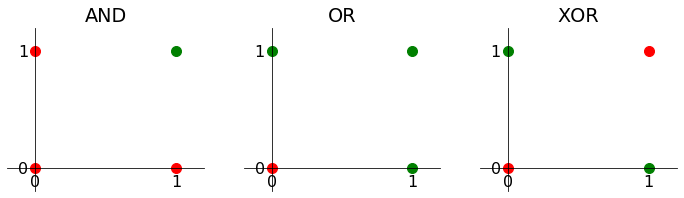

In [6]:
plot_perceptron()

### Funkcje aktywacji

Zamiast funkcji bipolarnej możemy zastosować funkcję sigmoidalną jako funkcję aktywacji.

In [7]:
def plot_activation_functions():
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    x = [-2,-.23,2] 
    y = [-1, -1, 1]
    plt.ylim(-1.2,1.2)
    plt.xlim(-2.2,2.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.step(x, y, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.subplot(122)
    x2 = np.linspace(-2,2,100)
    y2 = np.tanh(x2+ 0.23)
    plt.ylim(-1.2,1.2)
    plt.xlim(-2.2,2.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.plot(x2, y2, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.show()

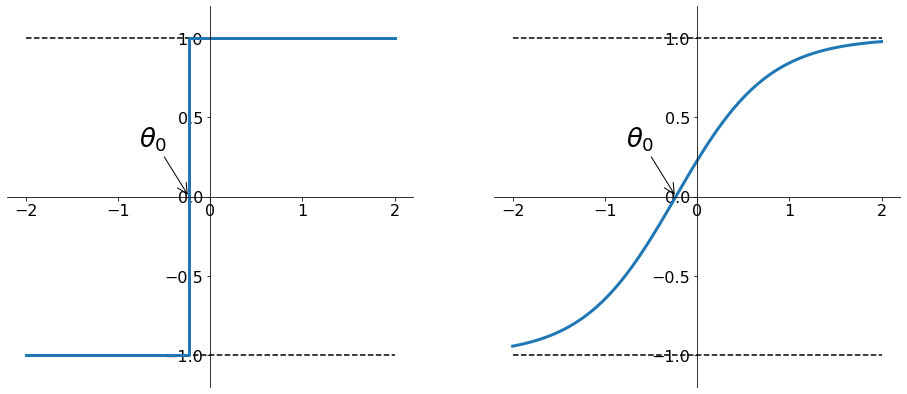

In [8]:
plot_activation_functions()

### Perceptron a regresja liniowa

<img src="reglin.png" width="70%"/>

### Uczenie regresji liniowej:
* Model: $$h_{\theta}(x) = \sum_{i=0}^n \theta_ix_i$$
* Funkcja kosztu (błąd średniokwadratowy): $$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$
* Po obliczeniu $\nabla J(\theta)$ - zwykły SGD.

### Perceptron a dwuklasowa regresja logistyczna

<img src="reglog.png" width="60%"/>

### Uczenie dwuklasowej regresji logistycznej:
* Model: $h_{\theta}(x) = \sigma(\sum_{i=0}^n \theta_ix_i) = P(1|x,\theta)$
* Funkcja kosztu (entropia krzyżowa): $$\begin{eqnarray} J(\theta) &=& -\frac{1}{m} \sum_{i=1}^{m} \big( y^{(i)}\log P(1|x^{(i)},\theta) \\ && + (1-y^{(i)})\log(1-P(1|x^{(i)},\theta)) \big) \end{eqnarray}$$
* Po obliczeniu $\nabla J(\theta)$ - zwykły SGD.

### Perceptron a wieloklasowa regresja logistyczna

<img src="multireglog.png" width="40%"/>

### Wieloklasowa regresja logistyczna
* Model (dla $c$ klasyfikatorów binarnych): 
$$\begin{eqnarray}
h_{(\theta^{(1)},\dots,\theta^{(c)})}(x) &=& \mathrm{softmax}(\sum_{i=0}^n \theta_{i}^{(1)}x_i, \ldots, \sum_{i=0}^n \theta_i^{(c)}x_i) \\ 
&=& \left[ P(k|x,\theta^{(1)},\dots,\theta^{(c)}) \right]_{k=1,\dots,c} 
\end{eqnarray}$$

* Funkcja kosztu (**przymując model regresji binarnej**): $$\begin{eqnarray} J(\theta^{(k)}) &=& -\frac{1}{m} \sum_{i=1}^{m} \big( y^{(i)}\log P(k|x^{(i)},\theta^{(k)}) \\ && + (1-y^{(i)})\log P(\neg k|x^{(i)},\theta^{(k)}) \big) \end{eqnarray}$$
* Po obliczeniu $\nabla J(\theta)$, **c-krotne** uruchomienie SGD, zastosowanie $\mathrm{softmax}(X)$ do niezależnie uzyskanych klasyfikatorów binarnych.

* Przyjmijmy: 
$$ \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c}$$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{gdy } x=y \\ 0 & \textrm{wpp.}\end{array}\right.$$

* Wieloklasowa funkcja kosztu $J(\Theta)$ (kategorialna entropia krzyżowa):
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

* Gradient $\nabla J(\Theta)$:
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) x^{(i)}_j 
$$

* Liczymy wszystkie wagi jednym uruchomieniem SGD

## Podsumowanie

* W przypadku jednowarstowej sieci neuronowej wystarczy znać gradient funkcji kosztu.
* Wtedy liczymy tak samo jak w przypadku regresji liniowej, logistycznej, wieloklasowej logistycznej itp. (wymienione modele to szczególne przypadki jednowarstwowych sieci neuronowych).
* Regresja liniowa i binarna regresja logistyczna to jeden neuron.
* Wieloklasowa regresja logistyczna to tyle neuronów, ile klas.

Funkcja aktywacji i funkcja kosztu są **dobierane do problemu**.

## 4.2. Funkcje aktywacji

* Każda funkcja aktywacji ma swoje zalety i wady.
* Różne rodzaje funkcji aktywacji nadają się do różnych zastosowań.

In [1]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.optimizers import Adagrad, Adam, RMSprop, SGD

from IPython.display import YouTubeVideo

/home/pawel/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plot(fun):
    x = np.arange(-3.0, 3.0, 0.01)
    y = [fun(x_i) for x_i in x]
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlim(-3.0, 3.0)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()
    ax.plot(x, y)
    plt.show()

### Funkcja logistyczna

$$ g(x) = \frac{1}{1 + e^{-x}} $$

* Przyjmuje wartości z przedziału $(0, 1)$.

#### Funkcja logistyczna – wykres

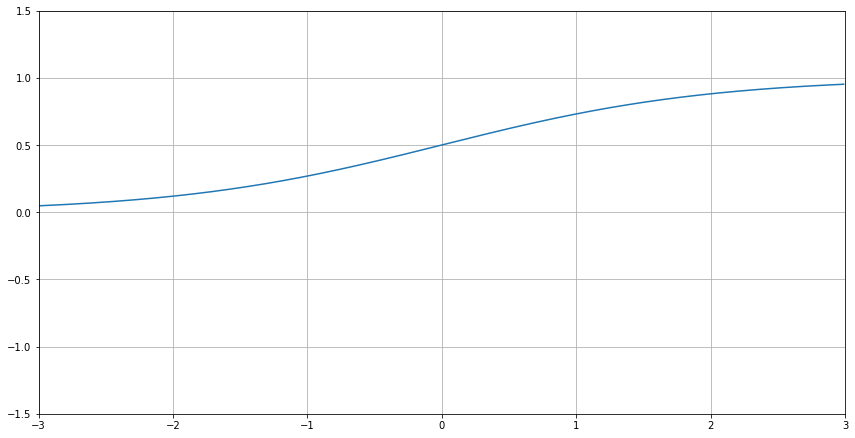

In [3]:
plot(lambda x: 1 / (1 + math.exp(-x)))

### Tangens hiperboliczny

$$ g(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

* Przyjmuje wartości z przedziału $(-1, 1)$.
* Powstaje z funkcji logistycznej przez przeskalowanie i przesunięcie.

#### Tangens hiperboliczny – wykres

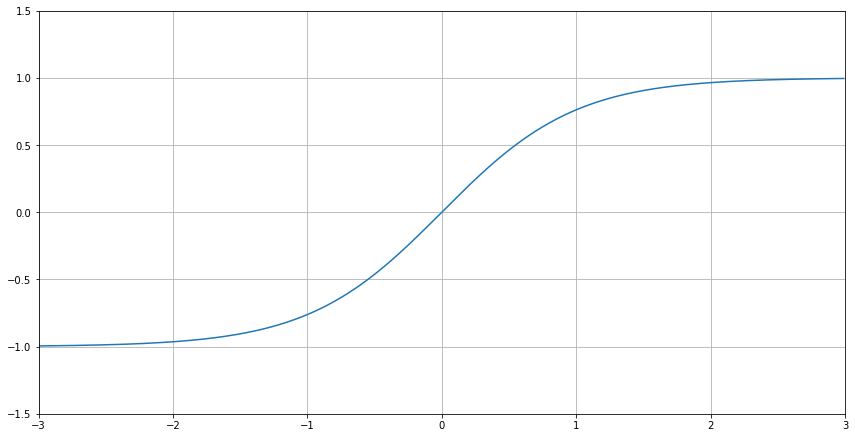

In [4]:
plot(lambda x: math.tanh(x))

### ReLU (*Rectifier Linear Unit*)

$$ g(x) = \max(0, x) $$

#### ReLU – zalety
* Mniej podatna na problem zanikającego gradientu (*vanishing gradient*) niż funkcje sigmoidalne, dzięki czemu SGD jest szybciej zbieżna.
* Prostsze obliczanie gradientu.
* Dzięki zerowaniu ujemnych wartości, wygasza neurony, „rozrzedzając” sieć (*sparsity*), co przyspiesza obliczenia.

#### ReLU – wady
* Dla dużych wartości gradient może „eksplodować”.
* „Wygaszanie” neuronów.

#### ReLU – wykres

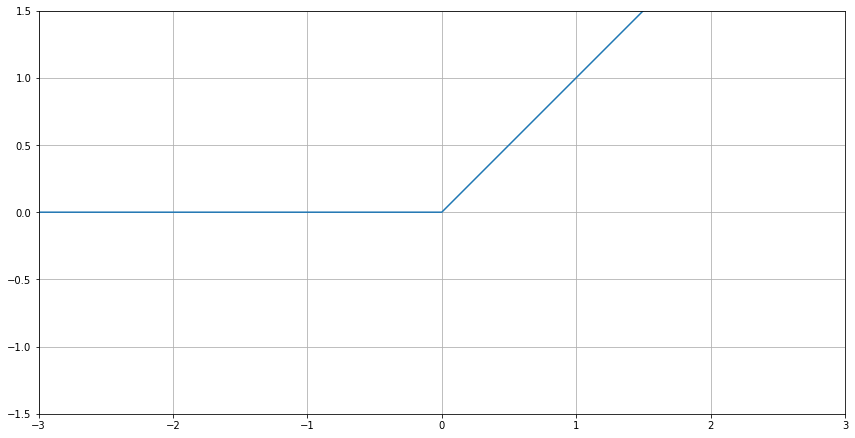

In [5]:
plot(lambda x: max(0, x))

### Softplus

$$ g(x) = \log(1 + e^{x}) $$

* Wygładzona wersja ReLU.

#### Softplus – wykres

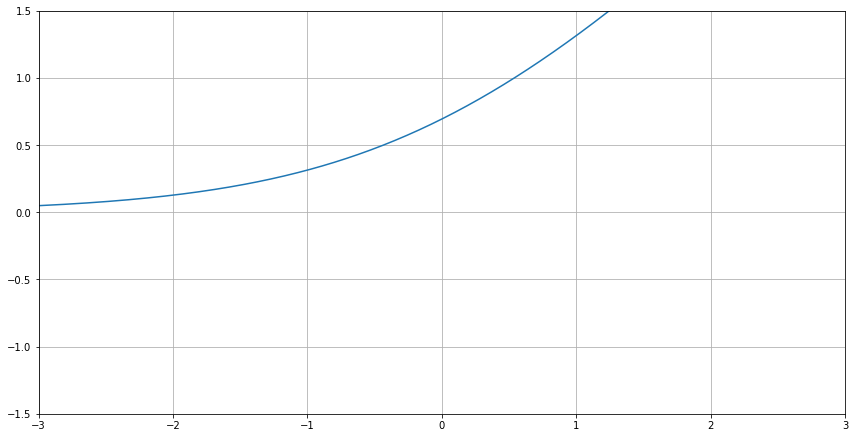

In [6]:
plot(lambda x: math.log(1 + math.exp(x)))

### Problem zanikającego gradientu (*vanishing gradient problem*)

* Sigmoidalne funkcje aktywacji ograniczają wartości na wyjściach neuronów do niewielkich przedziałów ($(-1, 1)$, $(0, 1)$ itp.).
* Jeżeli sieć ma wiele warstw, to podczas propagacji wstecznej mnożymy przez siebie wiele małych wartości → obliczony gradient jest mały.
* Im więcej warstw, tym silniejszy efekt zanikania.

#### Sposoby na zanikający gradient

* Modyfikacja algorytmu optymalizacji (*RProp*, *RMSProp*)
* Użycie innej funckji aktywacji (ReLU, softplus)
* Dodanie warstw *dropout*
* Nowe architektury (LSTM itp.)
* Więcej danych, zwiększenie mocy obliczeniowej

## 4.3. Wielowarstwowe sieci neuronowe

czyli _Artificial Neural Networks_ (ANN) lub _Multi-Layer Perceptrons_ (MLP)

<img src="nn1.png" width="70%"/>

### Architektura sieci

* Sieć neuronowa jako graf neuronów. 
* Organizacja sieci przez warstwy.
* Najczęściej stosowane są sieci jednokierunkowe i gęste.

* $n$-warstwowa sieć neuronowa ma $n+1$ warstw (nie liczymy wejścia).
* Rozmiary sieci określane poprzez liczbę neuronów lub parametrów.

### Sieć neuronowa jednokierunkowa (*feedforward*)

* Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(L)} $ oraz $\beta^{(1)}, \ldots, \beta^{(L)} $ liczymy:<br/><br/> 
$$a^{(l)} = g^{(l)}\left( a^{(l-1)} \Theta^{(l)} + \beta^{(l)} \right). $$

<img src="nn2.png" width=70%/>

* Funkcje $g^{(l)}$ to tzw. **funkcje aktywacji**.<br/>
Dla $i = 0$ przyjmujemy $a^{(0)} = \mathrm{x}$ (wektor wierszowy cech) oraz $g^{(0)}(x) = x$ (identyczność).

* Parametry $\Theta$ to wagi na połączeniach miedzy neuronami dwóch warstw.<br/>
Rozmiar macierzy $\Theta^{(l)}$, czyli macierzy wag na połączeniach warstw $a^{(l-1)}$ i $a^{(l)}$, to $\dim(a^{(l-1)}) \times \dim(a^{(l)})$.

* Parametry $\beta$ zastępują tutaj dodawanie kolumny z jedynkami do macierzy cech.<br/>Macierz $\beta^{(l)}$ ma rozmiar równy liczbie neuronów w odpowiedniej warstwie, czyli $1 \times \dim(a^{(l)})$.

* **Klasyfikacja**: dla ostatniej warstwy $L$ (o rozmiarze równym liczbie klas) przyjmuje się $g^{(L)}(x) = \mathop{\mathrm{softmax}}(x)$.
* **Regresja**: pojedynczy neuron wyjściowy jak na obrazku. Funkcją aktywacji może wtedy być np. funkcja identycznościowa.

* Pozostałe funkcje aktywacji najcześciej mają postać sigmoidy, np. sigmoidalna, tangens hiperboliczny.
* Mogą mieć też inny kształt, np. ReLU, leaky ReLU, maxout.

### Jak uczyć sieci neuronowe?

* W poznanych do tej pory algorytmach (regresja liniowa, regresja logistyczna) do uczenia używaliśmy funkcji kosztu, jej gradientu oraz algorytmu gradientu prostego (GD/SGD)

* Dla sieci neuronowych potrzebowalibyśmy również znaleźć gradient funkcji kosztu.

* Sprowadza się to do bardziej ogólnego problemu:<br/>jak obliczyć gradient $\nabla f(x)$ dla danej funkcji $f$ i wektora wejściowego $x$?

## 4.4. Metoda propagacji wstecznej – wprowadzenie

### Pochodna funkcji

* **Pochodna** mierzy, jak szybko zmienia się wartość funkcji względem zmiany jej argumentów:

$$ \frac{d f(x)}{d x} = \lim_{h \to 0} \frac{ f(x + h) - f(x) }{ h } $$

### Pochodna cząstkowa i gradient

* **Pochodna cząstkowa** mierzy, jak szybko zmienia się wartość funkcji względem zmiany jej *pojedynczego argumentu*.

* **Gradient** to wektor pochodnych cząstkowych:

$$ \nabla f = \left( \frac{\partial f}{\partial x_1}, \ldots, \frac{\partial f}{\partial x_n} \right) $$

#### Gradient – przykłady

$$ f(x_1, x_2) = x_1 + x_2 \qquad \to \qquad \frac{\partial f}{\partial x_1} = 1, \quad \frac{\partial f}{\partial x_2} = 1, \quad \nabla f = (1, 1) $$ 

$$ f(x_1, x_2) = x_1 \cdot x_2 \qquad \to \qquad \frac{\partial f}{\partial x_1} = x_2, \quad \frac{\partial f}{\partial x_2} = x_1, \quad \nabla f = (x_2, x_1) $$ 

$$ f(x_1, x_2) = \max(x_1 + x_2) \hskip{12em} \\
\to \qquad \frac{\partial f}{\partial x_1} = \mathbb{1}_{x \geq y}, \quad \frac{\partial f}{\partial x_2} = \mathbb{1}_{y \geq x}, \quad \nabla f = (\mathbb{1}_{x \geq y}, \mathbb{1}_{y \geq x}) $$ 

### Własności pochodnych cząstkowych

Jezeli $f(x, y, z) = (x + y) \, z$ oraz $x + y = q$, to:
$$f = q z,
\quad \frac{\partial f}{\partial q} = z,
\quad \frac{\partial f}{\partial z} = q,
\quad \frac{\partial q}{\partial x} = 1,
\quad \frac{\partial q}{\partial y} = 1 $$

### Reguła łańcuchowa

$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \, \frac{\partial q}{\partial x},
\quad \frac{\partial f}{\partial y} = \frac{\partial f}{\partial q} \, \frac{\partial q}{\partial y} $$

### Propagacja wsteczna – prosty przykład

In [2]:
# Dla ustalonego wejścia
x = -2; y = 5; z = -4

In [3]:
# Krok w przód
q = x + y
f = q * z
print(q, f)

(3, -12)


In [4]:
# Propagacja wsteczna dla f = q * z
dz = q
dq = z
# Propagacja wsteczna dla q = x + y
dx = 1 * dq  # z reguły łańcuchowej
dy = 1 * dq  # z reguły łańcuchowej
print([dx, dy, dz])

[-4, -4, 3]


<img src="exp1.png" />

* Właśnie tak wygląda obliczanie pochodnych metodą propagacji wstecznej!

* Spróbujmy czegoś bardziej skomplikowanego:<br/>metodą propagacji wstecznej obliczmy pochodną funkcji sigmoidalnej.

### Propagacja wsteczna – funkcja sigmoidalna

Funkcja sigmoidalna:

$$f(\theta,x) = \frac{1}{1+e^{-(\theta_0 x_0 + \theta_1 x_1 + \theta_2)}}$$

$$
\begin{array}{lcl}
f(x) = \frac{1}{x} \quad & \rightarrow & \quad \frac{df}{dx} = -\frac{1}{x^2} \\
f_c(x) = c + x \quad & \rightarrow & \quad \frac{df}{dx} = 1 \\
f(x) = e^x \quad & \rightarrow & \quad \frac{df}{dx} = e^x \\
f_a(x) = ax \quad & \rightarrow & \quad \frac{df}{dx} = a \\
\end{array}
$$

<img src="exp2.png" />

In [5]:
# Losowe wagi i dane
w = [2,-3,-3]
x = [-1, -2]

# Krok w przód
dot = w[0]*x[0] + w[1]*x[1] + w[2]
f = 1.0 / (1 + math.exp(-dot))  # funkcja sigmoidalna

# Krok w tył
ddot = (1 - f) * f  # pochodna funkcji sigmoidalnej
dx = [w[0] * ddot, w[1] * ddot]
dw = [x[0] * ddot, x[1] * ddot, 1.0 * ddot]

print(dx)
print(dw)

[0.3932238664829637, -0.5898357997244456]
[-0.19661193324148185, -0.3932238664829637, 0.19661193324148185]


### Obliczanie gradientów – podsumowanie

* Gradient $f$ dla $x$ mówi, jak zmieni się całe wyrażenie przy zmianie wartości $x$.

* Gradienty łączymy, korzystając z **reguły łańcuchowej**.

* W kroku "wstecz" gradienty informują, które części grafu powinny być zwiększone lub zmniejszone (i z jaką siłą), aby zwiększyć wartość na wyjściu.

* W kontekście implementacji chcemy dzielić funkcję $f$ na części, dla których można łatwo obliczyć gradienty.

## 4.5. Uczenie wielowarstwowych sieci neuronowych metodą propagacji wstecznej

Mając algorytm SGD oraz gradienty wszystkich wag, moglibyśmy trenować każdą sieć.

* Niech $\Theta = (\Theta^{(1)},\Theta^{(2)},\Theta^{(3)},\beta^{(1)},\beta^{(2)},\beta^{(3)})$
* Funkcja sieci neuronowej z grafiki:
$$\small h_\Theta(x) = \tanh(\tanh(\tanh(x\Theta^{(1)}+\beta^{(1)})\Theta^{(2)} + \beta^{(2)})\Theta^{(3)} + \beta^{(3)})$$
* Funkcja kosztu dla regresji:
$$J(\Theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_\Theta(x^{(i)})- y^{(i)})^2 $$

* Jak obliczymy gradienty?

$$\nabla_{\Theta^{(l)}} J(\Theta) = ? \quad \nabla_{\beta^{(l)}} J(\Theta) = ?$$

### W kierunku propagacji wstecznej

* Pewna (niewielka) zmiana wagi $\Delta z^l_j$ dla $j$-ego neuronu w warstwie $l$ pociąga za sobą (niewielką) zmianę kosztu: 

$$\frac{\partial J(\Theta)}{\partial z^{l}_j}  \Delta z^{l}_j$$

* Jeżeli $\frac{\partial J(\Theta)}{\partial z^{l}_j}$ jest duża, $\Delta z^l_j$ ze znakiem przeciwnym zredukuje koszt.
* Jeżeli $\frac{\partial J(\Theta)}{\partial z^l_j}$ jest bliska zeru, koszt nie będzie mocno poprawiony.

* Definiujemy błąd $\delta^l_j$ neuronu $j$ w warstwie $l$: 

$$\delta^l_j := \dfrac{\partial J(\Theta)}{\partial z^l_j}$$ 
$$\delta^l := \nabla_{z^l} J(\Theta) \quad \textrm{ (zapis wektorowy)} $$

### Podstawowe równania propagacji wstecznej

$$
\begin{array}{rcll}
\delta^L & = & \nabla_{a^L}J(\Theta) \odot { \left( g^{L} \right) }^{\prime} \left( z^L \right) & (BP1) \\[2mm]
\delta^{l} & = & \left( \left( \Theta^{l+1} \right) \! ^\top \, \delta^{l+1} \right) \odot {{ \left( g^{l} \right) }^{\prime}} \left( z^{l} \right) & (BP2)\\[2mm]
\nabla_{\beta^l} J(\Theta) & = & \delta^l & (BP3)\\[2mm]
\nabla_{\Theta^l} J(\Theta) & = & a^{l-1} \odot \delta^l & (BP4)\\
\end{array}
$$


#### (BP1)
$$ \delta^L_j \; = \; \frac{ \partial J }{ \partial a^L_j } \, g' \!\! \left( z^L_j \right) $$
$$ \delta^L \; = \; \nabla_{a^L}J(\Theta) \odot { \left( g^{L} \right) }^{\prime} \left( z^L \right) $$
Błąd w ostatniej warstwie jest iloczynem szybkości zmiany kosztu względem $j$-tego wyjścia i szybkości zmiany funkcji aktywacji w punkcie $z^L_j$.

#### (BP2)
$$ \delta^{l} \; = \; \left( \left( \Theta^{l+1} \right) \! ^\top \, \delta^{l+1} \right) \odot {{ \left( g^{l} \right) }^{\prime}} \left( z^{l} \right) $$
Aby obliczyć błąd w $l$-tej warstwie, należy przemnożyć błąd z następnej ($(l+1)$-szej) warstwy przez transponowany wektor wag, a uzyskaną macierz pomnożyć po współrzędnych przez szybkość zmiany funkcji aktywacji w punkcie $z^l$.

#### (BP3)
$$ \nabla_{\beta^l} J(\Theta) \; = \; \delta^l $$
Błąd w $l$-tej warstwie jest równy wartości gradientu funkcji kosztu.

#### (BP4)
$$ \nabla_{\Theta^l} J(\Theta) \; = \; a^{l-1} \odot \delta^l $$
Gradient funkcji kosztu względem wag $l$-tej warstwy można obliczyć jako iloczyn po współrzędnych $a^{l-1}$ przez $\delta^l$.

### Algorytm propagacji wstecznej

Dla pojedynczego przykładu $(x,y)$:
1. **Wejście**: Ustaw aktywacje w warstwie cech $a^{(0)}=x$ 
2. **Feedforward:** dla $l=1,\dots,L$ oblicz 
$z^{(l)} = a^{(l-1)} \Theta^{(l)} + \beta^{(l)}$ oraz $a^{(l)}=g^{(l)} \!\! \left( z^{(l)} \right)$
3. **Błąd wyjścia $\delta^{(L)}$:** oblicz wektor $$\delta^{(L)}= \nabla_{a^{(L)}}J(\Theta) \odot {g^{\prime}}^{(L)} \!\! \left( z^{(L)} \right) $$

4. **Propagacja wsteczna błędu:** dla $l = L-1,L-2,\dots,1$ oblicz $$\delta^{(l)} = \delta^{(l+1)}(\Theta^{(l+1)})^T \odot {g^{\prime}}^{(l)} \!\! \left( z^{(l)} \right) $$
5. **Gradienty:** 
    * $\dfrac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = a_i^{(l-1)}\delta_j^{(l)} \textrm{ oraz } \dfrac{\partial}{\partial \beta_{j}^{(l)}} J(\Theta) = \delta_j^{(l)}$

W naszym przykładzie:

$$\small J(\Theta) = \frac{1}{2} \left( a^{(L)} - y \right) ^2 $$
$$\small  \dfrac{\partial}{\partial a^{(L)}} J(\Theta) = a^{(L)} - y$$

$$\small \tanh^{\prime}(x) = 1 - \tanh^2(x)$$

<img src="nn3.png" width="65%"/>

### Algorytm SGD z propagacją wsteczną

Pojedyncza iteracja:
1. Dla parametrów $\Theta = (\Theta^{(1)},\ldots,\Theta^{(L)})$ utwórz pomocnicze macierze zerowe $\Delta = (\Delta^{(1)},\ldots,\Delta^{(L)})$ o takich samych wymiarach (dla uproszczenia opuszczono wagi $\beta$).

2. Dla $m$ przykładów we wsadzie (*batch*), $i = 1,\ldots,m$:
    * Wykonaj algortym propagacji wstecznej dla przykładu $(x^{(i)}, y^{(i)})$ i przechowaj gradienty $\nabla_{\Theta}J^{(i)}(\Theta)$ dla tego przykładu;
    * $\Delta := \Delta + \dfrac{1}{m}\nabla_{\Theta}J^{(i)}(\Theta)$
3. Wykonaj aktualizację wag: $\Theta := \Theta - \alpha \Delta$

### Propagacja wsteczna – podsumowanie

* Algorytm pierwszy raz wprowadzony w latach 70. XX w.
* W 1986 David Rumelhart, Geoffrey Hinton i Ronald Williams pokazali, że jest znacznie szybszy od wcześniejszych metod.
* Obecnie najpopularniejszy algorytm uczenia sieci neuronowych.

## 4.6. Przykłady implementacji wielowarstwowych sieci neuronowych

### Uwaga!

Poniższe przykłady wykorzystują interfejs [Keras](https://keras.io), który jest częścią biblioteki [TensorFlow](https://www.tensorflow.org).

Aby uruchomić TensorFlow w środowisku Jupyter, należy wykonać następujące czynności:

#### Przed pierwszym uruchomieniem (wystarczy wykonać tylko raz)

Instalacja biblioteki TensorFlow w środowisku Anaconda:

1. Uruchom *Anaconda Navigator*
1. Wybierz kafelek *CMD.exe Prompt*
1. Kliknij przycisk *Launch*
1. Pojawi się konsola. Wpisz następujące polecenia, każde zatwierdzając wciśnięciem klawisza Enter:
```
conda create -n tf tensorflow
conda activate tf
conda install pandas matplotlib
jupyter notebook
```

#### Przed każdym uruchomieniem

Jeżeli chcemy korzystać z biblioteki TensorFlow, to środowisko Jupyter Notebook należy uruchomić w następujący sposób:

1. Uruchom *Anaconda Navigator*
1. Wybierz kafelek *CMD.exe Prompt*
1. Kliknij przycisk *Launch*
1. Pojawi się konsola. Wpisz następujące polecenia, każde zatwierdzając wciśnięciem klawisza Enter:
```
conda activate tf
jupyter notebook
```

### Przykład: MNIST

_Modified National Institute of Standards and Technology database_

* Zbiór cyfr zapisanych pismem odręcznym
* 60 000 przykładów uczących, 10 000 przykładów testowych
* Rozdzielczość każdego przykładu: 28 × 28 = 784 piksele

In [52]:
# źródło: https://github.com/keras-team/keras/examples/minst_mlp.py

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout

# załaduj dane i podziel je na zbiory uczący i testowy
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
from matplotlib import pyplot as plt

def draw_examples(examples, captions=None):
    plt.figure(figsize=(16, 4))
    m = len(examples)
    for i, example in enumerate(examples):
        plt.subplot(100 + m * 10 + i + 1)
        plt.imshow(example, cmap=plt.get_cmap('gray'))
    plt.show()
    if captions is not None:
        print(6 * ' ' + (10 * ' ').join(str(captions[i]) for i in range(m)))

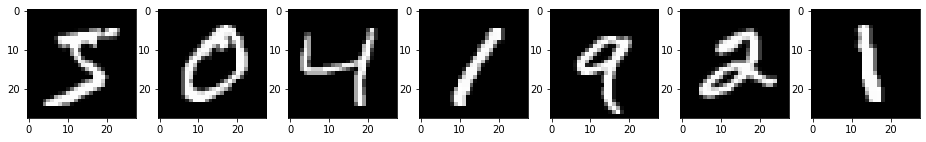

      5          0          4          1          9          2          1


In [54]:
draw_examples(x_train[:7], captions=y_train)

In [55]:
num_classes = 10

x_train = x_train.reshape(60000, 784)  # 784 = 28 * 28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('{} przykładów uczących'.format(x_train.shape[0]))
print('{} przykładów testowych'.format(x_test.shape[0]))

# przekonwertuj wektory klas na binarne macierze klas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 przykładów uczących
10000 przykładów testowych


In [56]:
model = keras.Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
print(x_train.shape, y_train.shape)

(60000, 784) (60000, 10)


In [58]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 11s 23ms/step - loss: 0.2463 - accuracy: 0.9238 - val_loss: 0.1009 - val_accuracy: 0.9690
Epoch 2/5
469/469 [==============================] - 10s 22ms/step - loss: 0.1042 - accuracy: 0.9681 - val_loss: 0.0910 - val_accuracy: 0.9739
Epoch 3/5
469/469 [==============================] - 11s 23ms/step - loss: 0.0774 - accuracy: 0.9762 - val_loss: 0.0843 - val_accuracy: 0.9755
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0691 - val_accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0886 - val_accuracy: 0.9772


In [60]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.08859136700630188
Test accuracy: 0.9771999716758728


Warstwa _dropout_ to metoda regularyzacji, służy zapobieganiu nadmiernemu dopasowaniu sieci. Polega na tym, że część węzłów sieci jest usuwana w sposób losowy.

In [61]:
# Bez warstw Dropout

num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)  # 784 = 28 * 28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_no_dropout = keras.Sequential()
model_no_dropout.add(Dense(512, activation='relu', input_shape=(784,)))
model_no_dropout.add(Dense(512, activation='relu'))
model_no_dropout.add(Dense(num_classes, activation='softmax'))
model_no_dropout.summary()

model_no_dropout.compile(loss='categorical_crossentropy',
                         optimizer=keras.optimizers.RMSprop(),
                         metrics=['accuracy'])

model_no_dropout.fit(x_train, y_train,
                     batch_size=128,
                     epochs=5,
                     verbose=1,
                     validation_data=(x_test, y_test))

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 10s 20ms/step - loss: 0.2203 - accuracy: 0.9317 - val_loss: 0.0936 - val_accuracy: 0.9697
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0816 - accuracy: 0.9746 - val_loss: 0.0747 - val_accuracy: 0.9779
Epoch 3/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0544 - accurac

In [62]:
# Bez warstw Dropout

score = model_no_dropout.evaluate(x_test, y_test, verbose=0)

print('Test loss (no dropout): {}'.format(score[0]))
print('Test accuracy (no dropout): {}'.format(score[1]))

Test loss (no dropout): 0.07358124107122421
Test accuracy (no dropout): 0.9800999760627747


In [63]:
# Więcej warstw, inna funkcja aktywacji

num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)  # 784 = 28 * 28
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = keras.Sequential()
model3.add(Dense(2500, activation='tanh', input_shape=(784,)))
model3.add(Dense(2000, activation='tanh'))
model3.add(Dense(1500, activation='tanh'))
model3.add(Dense(1000, activation='tanh'))
model3.add(Dense(500, activation='tanh'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()

model3.compile(loss='categorical_crossentropy',
               optimizer=keras.optimizers.RMSprop(),
               metrics=['accuracy'])

model3.fit(x_train, y_train,
           batch_size=128,
           epochs=10,
           verbose=1,
           validation_data=(x_test, y_test))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 2500)              1962500   
_________________________________________________________________
dense_66 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
dense_67 (Dense)             (None, 1500)              3001500   
_________________________________________________________________
dense_68 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_69 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                5010      
Total params: 11,972,510
Trainable params: 11,972,510
Non-trainable params: 0
_________________________________________

In [64]:
# Więcej warstw, inna funkcja aktywacji

score = model3.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.10945799201726913
Test accuracy: 0.9697999954223633


### Przykład: 4-pikselowy aparat fotograficzny

https://www.youtube.com/watch?v=ILsA4nyG7I0

In [65]:
def generate_example(description):
    variant = random.choice([1, -1])
    if description == 's':  # solid
        return (np.array([[ 1.0,  1.0], [ 1.0,  1.0]]) if variant == 1 else
                np.array([[-1.0, -1.0], [-1.0, -1.0]]))
    elif description == 'v':  # vertical
        return (np.array([[ 1.0, -1.0], [ 1.0, -1.0]]) if variant == 1 else
                np.array([[-1.0,  1.0], [-1.0,  1.0]]))
    elif description == 'd':  # diagonal
        return (np.array([[ 1.0, -1.0], [-1.0,  1.0]]) if variant == 1 else
                np.array([[-1.0,  1.0], [ 1.0, -1.0]]))
    elif description == 'h':  # horizontal
        return (np.array([[ 1.0,  1.0], [-1.0, -1.0]]) if variant == 1 else
                np.array([[-1.0, -1.0], [ 1.0,  1.0]]))
    else:
        return np.array([[random.uniform(-1, 1), random.uniform(-1, 1)],
                         [random.uniform(-1, 1), random.uniform(-1, 1)]])

In [67]:
import random

num_classes = 4

trainset_size = 4000
testset_size = 1000

y4_train = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(trainset_size)])
x4_train = np.array([generate_example(desc) for desc in y4_train])

y4_test = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(testset_size)])
x4_test = np.array([generate_example(desc) for desc in y4_test])

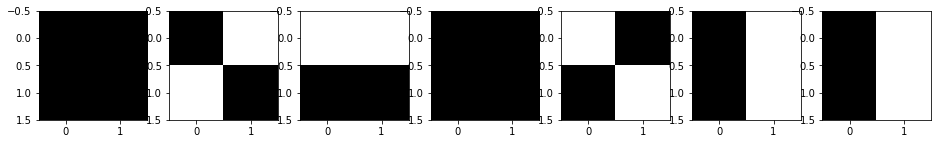

      s          d          h          s          d          v          v


In [68]:
draw_examples(x4_train[:7], captions=y4_train)

In [69]:
x4_train = x4_train.reshape(trainset_size, 4)
x4_test = x4_test.reshape(testset_size, 4)
x4_train = x4_train.astype('float32')
x4_test = x4_test.astype('float32')

y4_train = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y4_train])
y4_test = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y4_test])

y4_train = keras.utils.to_categorical(y4_train, num_classes)
y4_test = keras.utils.to_categorical(y4_test, num_classes)

In [70]:
model4 = keras.Sequential()
model4.add(Dense(4, activation='tanh', input_shape=(4,)))
model4.add(Dense(4, activation='tanh'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_73 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 36        
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [71]:
model4.layers[0].set_weights(
    [np.array([[ 1.0,  0.0,  1.0,  0.0],
               [ 0.0,  1.0,  0.0,  1.0],
               [ 1.0,  0.0, -1.0,  0.0],
               [ 0.0,  1.0,  0.0, -1.0]],
              dtype=np.float32), np.array([0., 0., 0., 0.], dtype=np.float32)])
model4.layers[1].set_weights(
    [np.array([[ 1.0, -1.0,  0.0,  0.0],
               [ 1.0,  1.0,  0.0,  0.0],
               [ 0.0,  0.0,  1.0, -1.0],
               [ 0.0,  0.0, -1.0, -1.0]],
              dtype=np.float32), np.array([0., 0., 0., 0.], dtype=np.float32)])
model4.layers[2].set_weights(
    [np.array([[ 1.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
               [ 0.0,  0.0,  1.0, -1.0,  0.0,  0.0,  0.0,  0.0],
               [ 0.0,  0.0,  0.0,  0.0,  1.0, -1.0,  0.0,  0.0],
               [ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  1.0, -1.0]],
              dtype=np.float32), np.array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=np.float32)])

In [73]:
model4.layers[3].set_weights(
    [np.array([[ 1.0,  0.0,  0.0,  0.0],
               [ 1.0,  0.0,  0.0,  0.0],
               [ 0.0,  1.0,  0.0,  0.0],
               [ 0.0,  1.0,  0.0,  0.0],
               [ 0.0,  0.0,  1.0,  0.0],
               [ 0.0,  0.0,  1.0,  0.0],
               [ 0.0,  0.0,  0.0,  1.0],
               [ 0.0,  0.0,  0.0,  1.0]],
              dtype=np.float32), np.array([0., 0., 0., 0.], dtype=np.float32)])

model4.compile(loss='categorical_crossentropy',
               optimizer=keras.optimizers.Adagrad(),
               metrics=['accuracy'])

In [74]:
for layer in model4.layers:
    print(layer.get_weights())

[array([[ 1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  0., -1.]], dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[ 1., -1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -1.],
       [ 0.,  0., -1., -1.]], dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1.]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]
[array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32), array([0., 0., 0., 0.], dtype=float32)]


In [75]:
model4.predict([np.array([[1.0, 1.0], [-1.0, -1.0]]).reshape(1, 4)])

array([[0.17831734, 0.17831734, 0.17831734, 0.465048  ]], dtype=float32)

In [76]:
score = model4.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.7656148672103882
Test accuracy: 1.0


In [77]:
model5 = keras.Sequential()
model5.add(Dense(4, activation='tanh', input_shape=(4,)))
model5.add(Dense(4, activation='tanh'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))
model5.compile(loss='categorical_crossentropy',
               optimizer=keras.optimizers.RMSprop(),
               metrics=['accuracy'])
model5.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_78 (Dense)             (None, 4)                 36        
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [78]:
model5.fit(x4_train, y4_train, epochs=8, validation_data=(x4_test, y4_test))

Epoch 1/8
125/125 [==============================] - 0s 3ms/step - loss: 1.3126 - accuracy: 0.3840 - val_loss: 1.1926 - val_accuracy: 0.6110
Epoch 2/8
125/125 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.5980 - val_loss: 1.0085 - val_accuracy: 0.6150
Epoch 3/8
125/125 [==============================] - 0s 2ms/step - loss: 0.9243 - accuracy: 0.7035 - val_loss: 0.8416 - val_accuracy: 0.7380
Epoch 4/8
125/125 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.8740 - val_loss: 0.6738 - val_accuracy: 1.0000
Epoch 5/8
125/125 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 1.0000 - val_loss: 0.5030 - val_accuracy: 1.0000
Epoch 6/8
125/125 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 1.0000 - val_loss: 0.3428 - val_accuracy: 1.0000
Epoch 7/8
125/125 [==============================] - 0s 2ms/step - loss: 0.2713 - accuracy: 1.0000 - val_loss: 0.2161 - val_accuracy: 1.0000
Epoch 8/8
125

In [79]:
model5.predict([np.array([[1.0, 1.0], [-1.0, -1.0]]).reshape(1, 4)])

array([[3.2040708e-02, 1.0065207e-03, 4.9596769e-04, 9.6645677e-01]],
      dtype=float32)

In [80]:
score = model5.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.1224619448184967
Test accuracy: 1.0


In [81]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)

In [82]:
with printoptions(precision=1, suppress=True):
    for layer in model5.layers:
        print(layer.get_weights())

[array([[ 0.7,  0.2, -0.7,  0.7],
       [-0.5,  0.9,  0.6,  0.6],
       [ 1.1,  0.2,  0.1,  0.2],
       [ 0.7,  0.1,  0.3, -0.7]], dtype=float32), array([ 0. ,  0.1, -0.1, -0.2], dtype=float32)]
[array([[ 0.7,  0.5, -1.1, -1.2],
       [ 0.7,  0.9, -0.6,  0.3],
       [ 0.1,  1.4, -0.6,  0.8],
       [ 1.5,  0.1, -0.1,  0.9]], dtype=float32), array([-0.4,  0.2, -0. ,  0.2], dtype=float32)]
[array([[-1. ,  1. , -0.7, -0.3,  0.2,  1.3, -0.7,  0.9],
       [-0.9,  0.5,  0.8, -1.3, -1.2,  1.3,  0.4, -1. ],
       [ 0.9,  0.2,  0.3,  0.4,  1.3, -0.9, -0.1, -0.2],
       [-0.4,  0.5,  1.1, -0.6,  1.1,  0.1, -1.5, -1. ]], dtype=float32), array([-0.1,  0.1,  0.1,  0.1,  0.2, -0. ,  0.1,  0.2], dtype=float32)]
[array([[ 0.7, -0.5,  0.8, -0.5],
       [-0.3, -1.6, -0.2,  0.1],
       [-1.5,  0.9,  0.1, -0.5],
       [ 0.6,  0.7,  1. , -1.4],
       [ 0.7, -1.2, -1.6,  1.2],
       [ 1. , -1.2,  0.3, -1.5],
       [-0.2,  0. ,  0.6,  1.3],
       [-0.8,  0.2, -0.6, -1. ]], dtype=float32), arra